In [ ]:
"""This code will scrap data from wikipedia of all the countries in the continent 
and plot it against the happiness of those countries"""

In [1]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns

###### Connecting to Webpage and getting the entire page

In [2]:
wikiCountinentPage = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents")

In [3]:
wikiCountinentPage

<Response [200]>

In [4]:
print(wikiCountinentPage.status_code)

200


###### Parsing the data using beautifulsoup

In [6]:
soup = BeautifulSoup(wikiCountinentPage.content,'html.parser')
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"14b0be27-5ada-448c-8a7e-ffc78e42c8fb","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_continents","wgTitle":"List of countries by continents","wgCurRevisionId":7886584,"wgRevisionId":7886584,"wgArticleId":4810,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from January 2020","All articl

In [7]:
#Creating a html file of page's data
file = open("country_list_continent.html","w",encoding = "utf-8")
file.write(str(soup))
file.close()

In [8]:
#Reading the file back for further processing
soup = BeautifulSoup(open("country_list_continent.html","r",encoding = "utf-8"),"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by continents - Simple English Wikipedia, the free encyclopedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"14b0be27-5ada-448c-8a7e-ffc78e42c8fb","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_continents","wgTitle":"List of countries by continents","wgCurRevisionId":7886584,"wgRevisionId":7886584,"wgArticleId":4810,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from January 

In [9]:
# Getting the data from file using class attribute and filtering the information not required
listOfContinent = soup.find_all("span", attrs={"class": "toctext"})
continentList = []
for con in listOfContinent:
    if con.get_text().strip() != 'References' and con.get_text().strip() != 'Other websites' and con.get_text().strip() != 'Antarctica':
        continentList.append(con.text.strip())

In [10]:
print(continentList)

['Africa', 'Asia', 'Europe', 'North and Central America', 'South America', 'Oceania']


In [11]:
#Find list of all the countries
countryList = soup.find_all("ol", attrs = {"class":None})

In [12]:
#Removing Extra data
print(countryList)
countryList.pop()

[<ol><li><a href="/wiki/Algeria" title="Algeria">Algeria</a> - <a href="/wiki/Algiers" title="Algiers">Algiers</a></li>
<li><a href="/wiki/Angola" title="Angola">Angola</a> - <a href="/wiki/Luanda" title="Luanda">Luanda</a></li>
<li><a href="/wiki/Benin" title="Benin">Benin</a> - <a class="mw-redirect" href="/wiki/Porto_Novo" title="Porto Novo">Porto Novo</a>, <a href="/wiki/Cotonou" title="Cotonou">Cotonou</a></li>
<li><a href="/wiki/Botswana" title="Botswana">Botswana</a> - <a href="/wiki/Gaborone" title="Gaborone">Gaborone</a></li>
<li><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a> - <a href="/wiki/Ouagadougou" title="Ouagadougou">Ouagadougou</a></li>
<li><a href="/wiki/Burundi" title="Burundi">Burundi</a> - <a href="/wiki/Gitega" title="Gitega">Gitega</a></li>
<li><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a> (also spelled Cameroun) - <a href="/wiki/Yaound%C3%A9" title="Yaoundé">Yaoundé</a></li>
<li><a href="/wiki/Cape_Verde" title="Cape Verde">Cape Ver

<ol><li><a href="/wiki/Australia" title="Australia">Australia</a></li>
<li><a href="/wiki/Flores" title="Flores">Flores</a></li>
<li><a href="/wiki/Lombok" title="Lombok">Lombok</a></li>
<li><a href="/wiki/Melanesia" title="Melanesia">Melanesia</a></li>
<li><a href="/wiki/New_Caledonia" title="New Caledonia">New Caledonia</a></li>
<li><a href="/wiki/New_Guinea" title="New Guinea">New Guinea</a></li>
<li><a href="/wiki/Sulawesi" title="Sulawesi">Sulawesi</a></li>
<li><a href="/wiki/Sumbawa" title="Sumbawa">Sumbawa</a></li>
<li><a href="/wiki/Timor" title="Timor">Timor</a></li></ol>

In [13]:
#Storing all the countries in a list of lists
ItemLists = []
for li in countryList:
    listItems = li.find_all('li')
    listOfData = [data.text.strip() for data in listItems]
    ItemLists.append(listOfData)
print(ItemLists)

[['Algeria - Algiers', 'Angola - Luanda', 'Benin - Porto Novo, Cotonou', 'Botswana - Gaborone', 'Burkina Faso - Ouagadougou', 'Burundi - Gitega', 'Cameroon (also spelled Cameroun) - Yaoundé', 'Cape Verde - Praia', 'Central African Republic - Bangui', "Chad (Tchad) - N'Djamena", 'Comoros - Moroni', 'Republic of the Congo - Brazzaville', 'Democratic Republic of the Congo (Zaire) - Kinshasa', "Côte d'Ivoire (Ivory Coast) - Yamoussoukro", 'Djibouti - Djibouti', 'Equatorial Guinea - Malabo', 'Egypt (Misr) - Cairo', 'Eritrea - Asmara', 'Ethiopia (Abyssinia) - Addis Ababa', 'Gabon - Libreville', 'The Gambia - Banjul', 'Ghana - Accra', 'Guinea - Conakry', 'Guinea-Bissau - Bissau', 'Kenya - Nairobi', 'Lesotho - Maseru', 'Liberia - Monrovia', 'Libya - Tripoli', 'Madagascar - Antananarivo', 'Malawi - Lilongwe', 'Mali - Bamako', 'Mauritania - Nouakchott', 'Mauritius - Port Louis', 'Morocco (Al Maghrib) - Rabat', 'Mozambique - Maputo', 'Namibia - Windhoek', 'Niger - Niamey', 'Nigeria - Abuja', 'Réu

In [14]:
#Removing capitals of countries
country = []
countryFinalList = []
for i in ItemLists:
    for j in i:
        try:
            str(j)
            str(i)
#             ind = j.index('-')
            country = [j[:j.index('-')-1] for j in i]
#             print(j)
            type(j)
        except:
            country = [j[:len(j)] for j in i]
#     print(i)
    countryFinalList.append(country)
print(countryFinalList)

[['Algeria - Algiers', 'Angola - Luanda', 'Benin - Porto Novo, Cotonou', 'Botswana - Gaborone', 'Burkina Faso - Ouagadougou', 'Burundi - Gitega', 'Cameroon (also spelled Cameroun) - Yaoundé', 'Cape Verde - Praia', 'Central African Republic - Bangui', "Chad (Tchad) - N'Djamena", 'Comoros - Moroni', 'Republic of the Congo - Brazzaville', 'Democratic Republic of the Congo (Zaire) - Kinshasa', "Côte d'Ivoire (Ivory Coast) - Yamoussoukro", 'Djibouti - Djibouti', 'Equatorial Guinea - Malabo', 'Egypt (Misr) - Cairo', 'Eritrea - Asmara', 'Ethiopia (Abyssinia) - Addis Ababa', 'Gabon - Libreville', 'The Gambia - Banjul', 'Ghana - Accra', 'Guinea - Conakry', 'Guinea-Bissau - Bissau', 'Kenya - Nairobi', 'Lesotho - Maseru', 'Liberia - Monrovia', 'Libya - Tripoli', 'Madagascar - Antananarivo', 'Malawi - Lilongwe', 'Mali - Bamako', 'Mauritania - Nouakchott', 'Mauritius - Port Louis', 'Morocco (Al Maghrib) - Rabat', 'Mozambique - Maputo', 'Namibia - Windhoek', 'Niger - Niamey', 'Nigeria - Abuja', 'Réu

In [16]:
#Removing the special characters found in the 2nd element of the list
newList = []
for i in countryFinalList[2]:
    try:
        i = (i[:i.index('-')-1])
        newList.append(i)
    except:
#         i = (i[:i.index('*')-1])
        newList.append(i)

In [17]:
#Removing the special characters left from previous process
newList2 = []
for i in newList:
    try:
        i = (i[:i.index('(')-1])
        newList2.append(i.replace('**',''))
    except:
        i = (i[:len(i)-1])
        newList2.append(i.replace('**',''))
countryFinalList[2] = newList2
# print(countryFinalList[2])


In [18]:
import pandas as pd

In [19]:
#Creating a datafrome from list of continents and list of countries
Continents_Countries = pd.DataFrame(continentList,columns =['Continent'])
Continents_Countries['Countries'] = countryFinalList
Continents_Countries

,Continent,Countries
0,Africa,"[Algeria - Algiers, Angola - Luanda, Benin - P..."
1,Asia,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba..."
2,Europe,"[Albania, Andorr, Austria, Belarus, Belgium, B..."
3,North and Central America,"[Canada - Ottawa, Mexico - Mexico City, United..."
4,South America,"[Brazil (Brasil), Argentina, Bolivia, Chile, C..."
5,Oceania,"[Australia, Fiji, New Zealand, Federated State..."


TABLE

In [20]:
#Expanding countries's row
Continents_Countries = Continents_Countries.explode('Countries').reset_index(drop=True)
print(Continents_Countries)

    Continent                    Countries
0      Africa            Algeria - Algiers
1      Africa              Angola - Luanda
2      Africa  Benin - Porto Novo, Cotonou
3      Africa          Botswana - Gaborone
4      Africa   Burkina Faso - Ouagadougou
..        ...                          ...
199   Oceania                        Samoa
200   Oceania              Solomon Islands
201   Oceania                        Tonga
202   Oceania                       Tuvalu
203   Oceania                      Vanuatu

[204 rows x 2 columns]


###### Getting Happiness analyses Per country

In [21]:
happinessPage = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report")
happinessPage

<Response [200]>

In [22]:
#Parsing the data
happinessSoup = BeautifulSoup(happinessPage.content,"html.parser")

In [23]:
#writing the data into a html file
happyFile = open("HappinessFile.html","w", encoding = "utf-8")
happyFile.write(str(happinessSoup))
happyFile.close()

In [24]:
#Reading back for further process
happySoup = BeautifulSoup(open("HappinessFile.html","r",encoding = "utf-8"),"html.parser")
print(happySoup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   World Happiness Report - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b1e4225d-6579-49d3-aecd-47843b562b94","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"World_Happiness_Report","wgTitle":"World Happiness Report","wgCurRevisionId":1052500013,"wgRevisionId":1052500013,"wgArticleId":42576223,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","All articles with dead external links","Articles with dead external links 

In [25]:
# happySoup.body

In [26]:
#Finding table in the page
HappyTable = [happySoup.find("table" , attrs = {"class":"wikitable sortable"})]
HappyTable

[<table class="wikitable sortable">
 <tbody><tr valign="top">
 <th style="width: 10px;">Overall rank
 </th>
 <th style="width: 250px;">Country or region
 </th>
 <th><abbr title="Happiness score">Score</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: GDP">GDP per capita</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Social support">Social support</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Healthy life expectancy">Healthy life expectancy</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Freedom to make life choices">Freedom to make life choices</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Generosity">Generosity</abbr>
 </th>
 <th style="width: 10px;"><abbr title="Explained by: Perceptions of corruption">Perceptions of corruption</abbr>
 </th></tr>
 <tr>
 <td>1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="1100" data-file-width="1800" decoding="async" h

In [27]:
#Finding rows and data inside the rows
for table in HappyTable:
    happyTableBody = table.find_all('tbody')
    happyRows = table.find_all('tr')
# print(type(happyRows))
happyTableData = []
for happyRow in happyRows:
    happyCols = happyRow.find_all('td')
    happyData = [data.text.strip() for data in happyCols]
    happyTableData.append(happyData)
del happyTableData[0]

In [28]:
print(happyTableData)

[['1', 'Finland', '7.809', '1.285', '1.500', '0.961', '0.662', '0.160', '0.478'], ['2', 'Denmark', '7.646', '1.327', '1.503', '0.979', '0.665', '0.243', '0.495'], ['3', 'Switzerland', '7.560', '1.391', '1.472', '1.041', '0.629', '0.269', '0.408'], ['4', 'Iceland', '7.504', '1.327', '1.548', '1.001', '0.662', '0.362', '0.145'], ['5', 'Norway', '7.488', '1.424', '1.495', '1.008', '0.670', '0.288', '0.434'], ['6', 'Netherlands', '7.449', '1.339', '1.464', '0.976', '0.614', '0.336', '0.369'], ['7', 'Sweden', '7.353', '1.322', '1.433', '0.986', '0.650', '0.273', '0.442'], ['8', 'New Zealand', '7.300', '1.242', '1.487', '1.008', '0.647', '0.326', '0.461'], ['9', 'Austria', '7.294', '1.317', '1.437', '1.001', '0.603', '0.256', '0.281'], ['10', 'Luxembourg', '7.238', '1.537', '1.388', '0.986', '0.610', '0.196', '0.367'], ['11', 'Canada', '7.232', '1.302', '1.435', '1.023', '0.644', '0.282', '0.352'], ['12', 'Australia', '7.223', '1.310', '1.477', '1.023', '0.622', '0.325', '0.336'], ['13', 'Un

###### Creating Dataframe

In [29]:
#Setting the headers of dataframe
Happiness_Frame = pd.DataFrame(happyTableData,columns =['Rank','Countries','happiness score','GDP per capital','social support'
                                                        ,'healthy life expectancy','freedom to make life choices',
                                                        'generosity','perceptions of corruption per country'])
Happiness_Frame

,Rank,Countries,happiness score,GDP per capital,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption per country
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111


In [30]:
#Writing to csv
Happiness_Frame.to_csv("Happiness_Score.csv")

In [31]:
#Reading data back for further processing
HappinessFile = open("Happiness_Score.csv",'r')
HappinessData = HappinessFile.read()
print(HappinessData)

,Rank,Countries,happiness score,GDP per capital,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption per country
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
5,6,Netherlands,7.449,1.339,1.464,0.976,0.614,0.336,0.369
6,7,Sweden,7.353,1.322,1.433,0.986,0.650,0.273,0.442
7,8,New Zealand,7.300,1.242,1.487,1.008,0.647,0.326,0.461
8,9,Austria,7.294,1.317,1.437,1.001,0.603,0.256,0.281
9,10,Luxembourg,7.238,1.537,1.388,0.986,0.610,0.196,0.367
10,11,Canada,7.232,1.302,1.435,1.023,0.644,0.282,0.352
11,12,Australia,7.223,1.310,1.477,1.023,0.622,0.325,0.336
12,13,United Kingdom,7.165,1.273,1.458,0.976,0.525,0.373,0.323
13,14,Israel,7.129,1.216,1.403,1.008,0.421,0.267,0.100
14,15,Costa Rica,7.121,0.981,1.375,0.940,0.645,0.1

In [32]:
import pandas as p

In [33]:
#Joining 2 continent's table to happiness score's table and writing to file
mergeredData = p.merge(Happiness_Frame,Continents_Countries, on='Countries', how='inner')
mergeredData.to_csv("Merged.csv")
mergeredData

,Rank,Countries,happiness score,GDP per capital,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption per country,Continent
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
...,...,...,...,...,...,...,...,...,...,...
73,125,Palestine,4.553,0.588,1.195,0.614,0.299,0.092,0.072,Asia
74,130,Sri Lanka,4.327,0.898,1.195,0.792,0.529,0.253,0.049,Asia
75,144,India,3.573,0.731,0.644,0.541,0.581,0.237,0.106,Asia
76,146,Yemen,3.527,0.393,1.177,0.415,0.244,0.095,0.087,Asia


In [34]:
import matplotlib.pyplot as plt

In [35]:
#Readind data back for further processing
plotData = pd.read_csv("Merged.csv",index_col = 2)
plotData

,Unnamed: 0,Rank,happiness score,GDP per capital,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption per country,Continent
Countries,,,,,,,,,,
Finland,0,1,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
Denmark,1,2,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
Switzerland,2,3,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
Iceland,3,4,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
Norway,4,5,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
...,...,...,...,...,...,...,...,...,...,...
Palestine,73,125,4.553,0.588,1.195,0.614,0.299,0.092,0.072,Asia
Sri Lanka,74,130,4.327,0.898,1.195,0.792,0.529,0.253,0.049,Asia
India,75,144,3.573,0.731,0.644,0.541,0.581,0.237,0.106,Asia


##### Plotting the distribution of happiness score per country

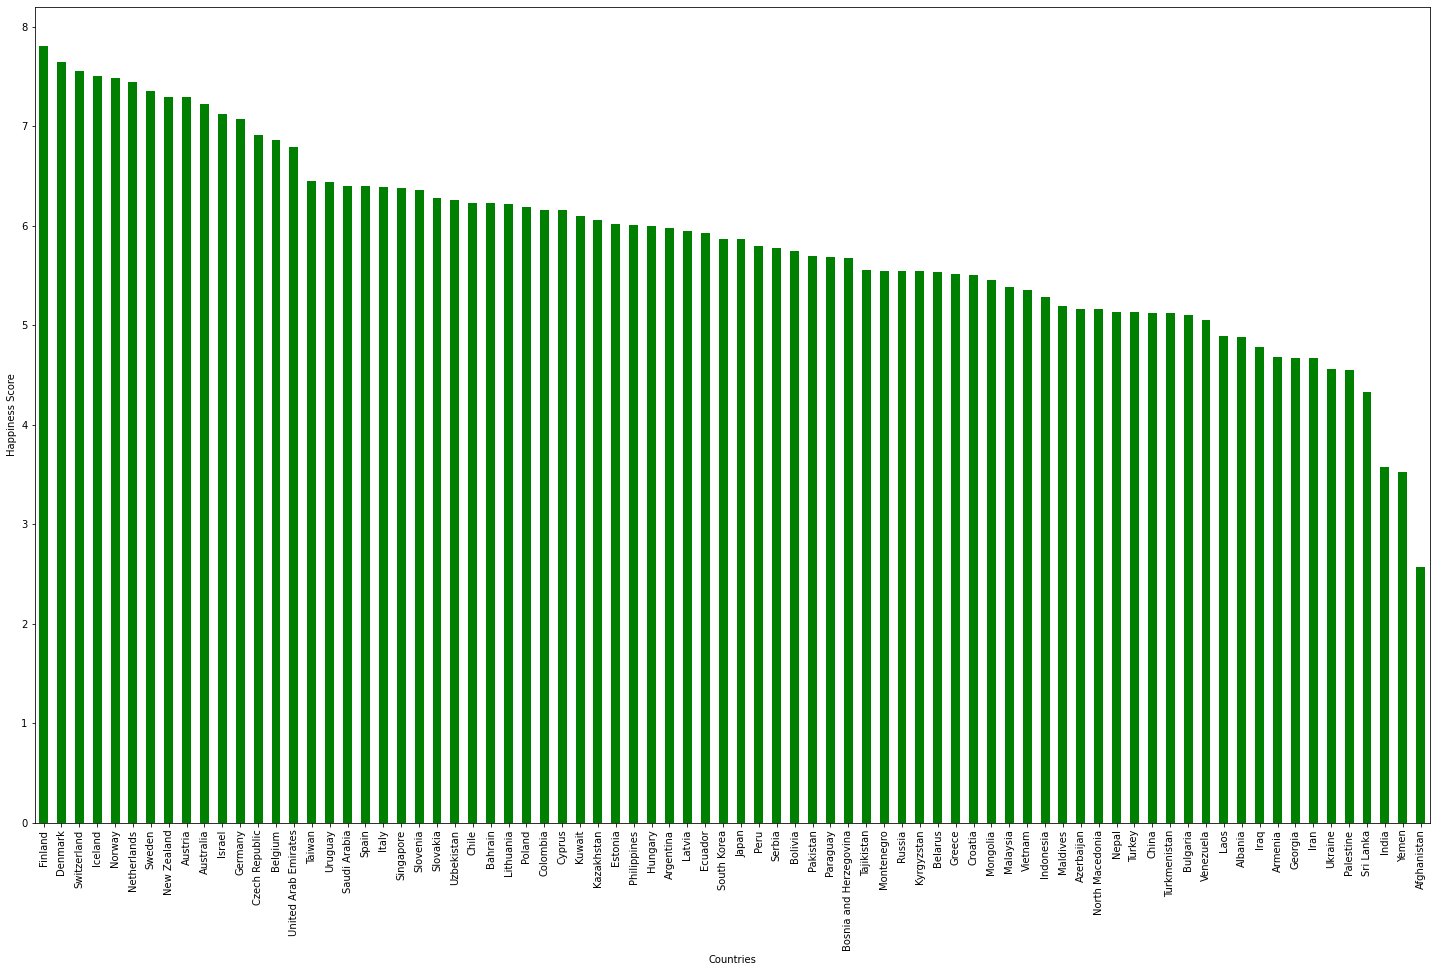

In [36]:
plt.figure(figsize=(25,15))
plotData['happiness score'].plot(kind='bar',color='green')
plt.ylabel("Happiness Score")
plt.xticks(rotation=90)
plt.show()

##### Plotting 10 least happy countries

In [37]:
plotData.tail(10)

,Unnamed: 0,Rank,happiness score,GDP per capital,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption per country,Continent
Countries,,,,,,,,,,
Iraq,68,110,4.785,0.982,1.011,0.529,0.284,0.153,0.073,Asia
Armenia,69,116,4.677,0.808,1.035,0.776,0.378,0.107,0.105,Asia
Georgia,70,117,4.673,0.847,0.731,0.695,0.485,0.048,0.174,Asia
Iran,71,118,4.672,1.029,0.886,0.749,0.301,0.277,0.143,Asia
Ukraine,72,123,4.561,0.780,1.321,0.699,0.319,0.179,0.010,Europe
Palestine,73,125,4.553,0.588,1.195,0.614,0.299,0.092,0.072,Asia
Sri Lanka,74,130,4.327,0.898,1.195,0.792,0.529,0.253,0.049,Asia
India,75,144,3.573,0.731,0.644,0.541,0.581,0.237,0.106,Asia
Yemen,76,146,3.527,0.393,1.177,0.415,0.244,0.095,0.087,Asia


##### Finding the average of happiness score

In [38]:
plotData['happiness score'].mean()

5.848858974358975

###### Finding the countries above median

In [39]:
medianPlotData = plotData['happiness score'].median()
medianPlotData

5.871500000000001

In [40]:
aboveMedian = plotData[plotData.iloc[:,2]>= medianPlotData ]
aboveMedian

,Unnamed: 0,Rank,happiness score,GDP per capital,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption per country,Continent
Countries,,,,,,,,,,
Finland,0,1,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
Denmark,1,2,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
Switzerland,2,3,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
Iceland,3,4,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
Norway,4,5,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
Netherlands,5,6,7.449,1.339,1.464,0.976,0.614,0.336,0.369,Europe
Sweden,6,7,7.353,1.322,1.433,0.986,0.650,0.273,0.442,Europe
New Zealand,7,8,7.300,1.242,1.487,1.008,0.647,0.326,0.461,Oceania
Austria,8,9,7.294,1.317,1.437,1.001,0.603,0.256,0.281,Europe


##### Plotting the correlation between 2 pairs of variables

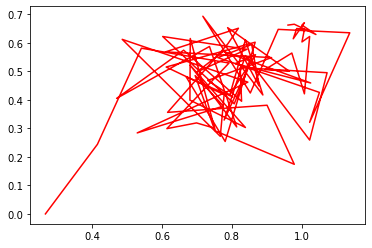

In [41]:
x = plotData['healthy life expectancy']
y = plotData['freedom to make life choices']
plt.plot(x,y,c='r')
plt.show()

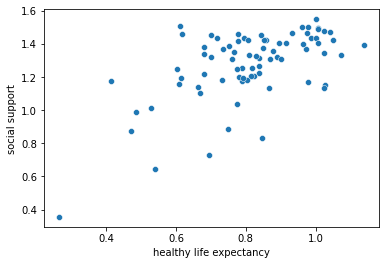

In [49]:
sns.scatterplot(x=plotData['healthy life expectancy'], y = plotData['social support'])

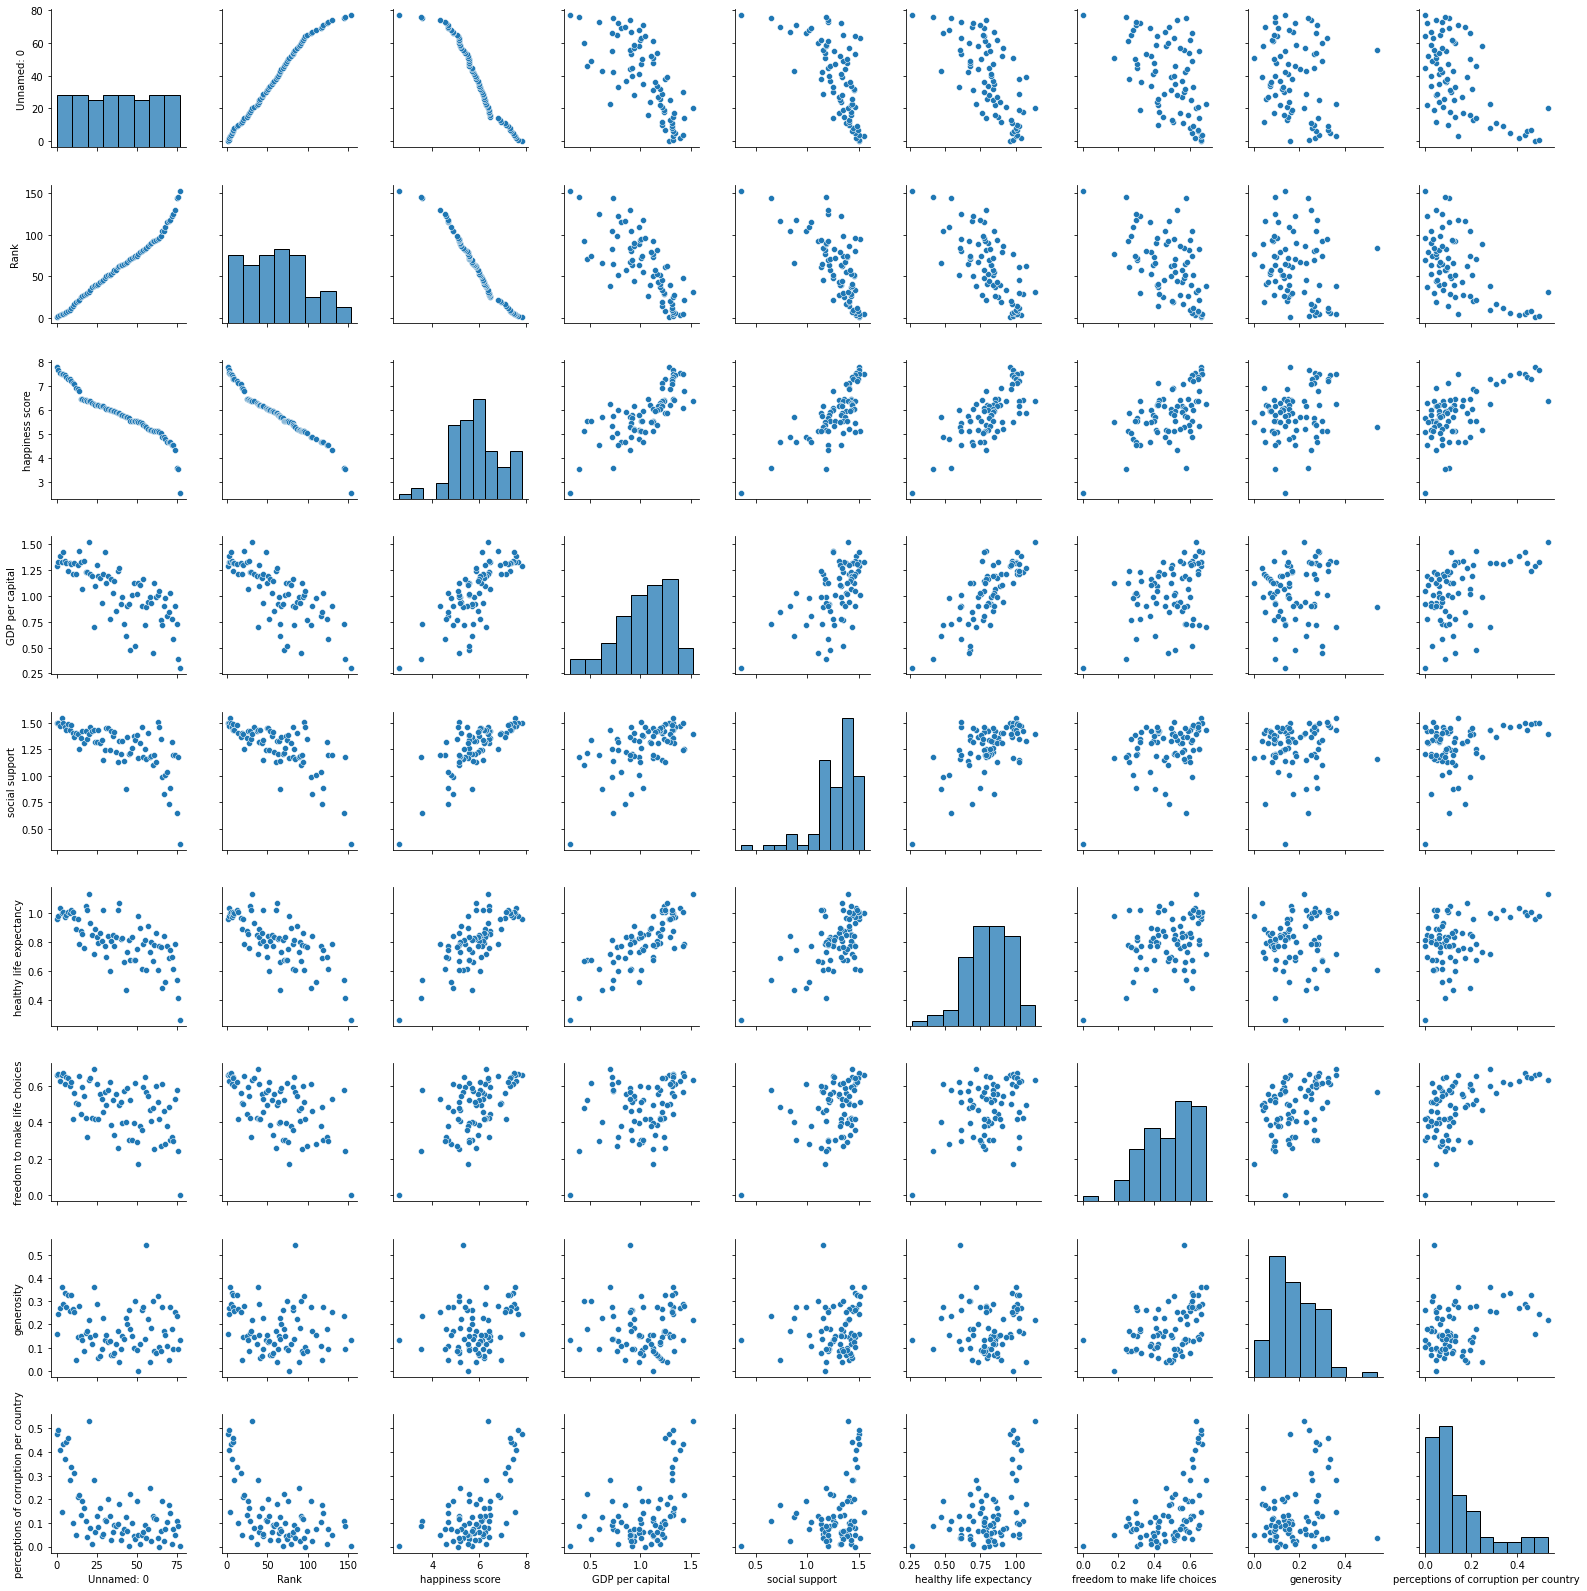

In [50]:
sns.pairplot(plotData)